In [1]:
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import ndimage





import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

from platform import python_version

print(python_version())

from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as num

%matplotlib inline
#setting different parameteres
params = {
    'font.family':'serif',
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
rcParams.update(params)




3.6.8


In [2]:
sys.argv[1] = System
folder = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/"
g = pd.DataFrame()
final = pd.DataFrame()
for index in range(1,6):
    equSys= folder + System + "_Dynamics_New_%d_Unrestricted_Vcorr.pspect"%(index)
    f= pd.read_csv(equSys,\
               delimiter="\t", names = ["freq","I"]   )
    f["I"] = f["I"]/sum(f["I"])
    g["freq"] = f.freq
    g["I%d"%(index)] = f.I
g["mean"] = g[["I1","I2","I3","I4","I5"]].mean(axis=1)
g["err"] = g[["I1","I2","I3","I4","I5"]].std(axis=1)/np.sqrt(5)

i= np.array(g.mean)
i_smooth = ndimage.gaussian_filter1d (i, 5*np.std(i))
g["smooth"] = i_smooth
final=g[["freq","smooth","mean","err"]]
final.to_csv(System+"AverageVcorrPspect", sep = "\t")

NameError: name 'System' is not defined

### Introduction to gaussian smoothing

In [104]:
folder = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWFAverageVcorrPspect.pspect"

df = pd.read_csv(folder, delimiter="\t", names=["f","smoothI","I","dI","dIP", "dIN"])
df.head()

,f,smoothI,I,dI,dIP,dIN
0,0.000000,0.000294,0.000315,0.000104,0.000418,0.000211
1,0.166774,0.000267,0.000266,0.000071,0.000337,0.000195
2,0.333547,0.000247,0.000210,0.000040,0.000250,0.000170
3,0.500321,0.000248,0.000274,0.000073,0.000347,0.000201
4,0.667095,0.000247,0.000241,0.000061,0.000302,0.000179


(0, 200)

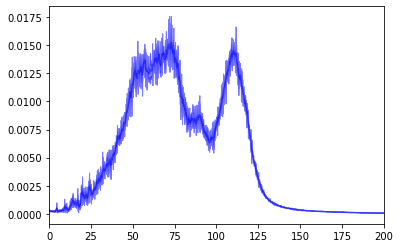

In [114]:
plt.plot(df.f,df.smoothI,alpha=0.5, color="blue")
plt.fill_between(df.f, df.dIN, df.dIP,alpha=0.5,color="blue")
plt.xlim([0,200])

In [79]:
from scipy import ndimage

In [84]:
i= np.array(df.I)
np.std(i)

0.14677348233947518

In [85]:
i_smooth = ndimage.gaussian_filter1d (i, 5*np.std(i))

(0, 200)

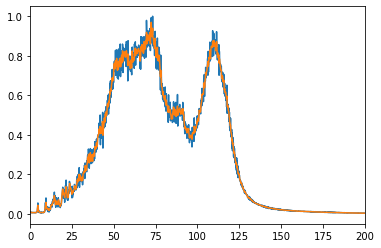

In [89]:
plt.plot(df.f,df.I)
plt.plot(df.f,i_smooth)

plt.xlim([0,200])

In [134]:
df[df.I<=0]

,f,I
1428,238.152856,0.0
1432,238.819951,0.0
1442,240.487688,0.0
6154,1026.325405,0.0
6156,1026.658952,0.0
6158,1026.992499,0.0
6160,1027.326047,0.0
6162,1027.659594,0.0
6164,1027.993142,0.0
6166,1028.326689,0.0


In [127]:
folder = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/MNWFAverageVcorrPspectAllInOne.pspect"

df = pd.read_csv(folder, delimiter="\t", names=["f","I"])
df.head()
dg = df[np.logical_and(df.I>0,df.f<150)]

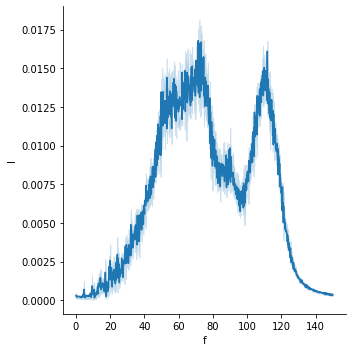

In [128]:
sb.relplot(x="f", y="I", kind="line", data=dg);

In [3]:
def DOSPlot(path,l,title,freqL=0,freqU=200):
    fig=plt.figure(figsize=(8,8))
    ax1=fig.add_subplot(2,1,1)
    ax1.set_title(title)

    labels=["DREAM(Au)", "EAM(Au)", "DREAM(Water)", "EAM(Water)","T(DREAM)", "T(EAM)"]
    colors = ["blue", "red", "green", "black","brown","indigo"]
    for index,file in enumerate(l[0:-2]):
        fullpath = path + file
        df = pd.read_csv(fullpath, delimiter="\t", names=["f","smoothI","I","dI","dIP", "dIN"])
        ax1.plot(df.f,df.smoothI,alpha=0.7,color=colors[index],label=labels[index])
        ax1.fill_between(df.f, df.dIN, df.dIP,alpha=0.2, color=colors[index])
    ax1.set_xlim([freqL,freqU])
    ax1.set_ylabel("Phonon Count")
    ax1.set_xlabel("$\omega$")
    ax1.legend()
    
    
    ax2=fig.add_subplot(2,1,2)
    for index, file in enumerate(l[-2:]):
        fullpath = path + l[4+index]
        df = pd.read_csv(fullpath, delimiter="\t", names=["f","T"])
        ax2.plot(df["f"],df["T"],alpha=0.7,color=colors[index+3],label=labels[index+3])
        ax2.set_xlim([freqL,freqU])
        ax2.set_ylabel("$T$")
        ax2.set_xlabel("$\omega$")
        ax2.legend()
    fig.show()
    
    
        

In [4]:
path = "/home/hbhattar/afs/Hemanta/metals/ThermalConductivity/EqulibratedSystem/"

def fileName(name):
    l = ["MF"+name+"AverageVcorrPspect.pspect",
     "MN"+name+"AverageVcorrPspect.pspect",
     "MF"+name+"AverageVcorrPspectWater.pspect",
     "MN"+name+"AverageVcorrPspectWater.pspect",
     "MF"+name+"TransmissionProb.trans",
     "MN"+name+"TransmissionProb.trans",
    
    ]
    return l
lMF=fileName("WF")

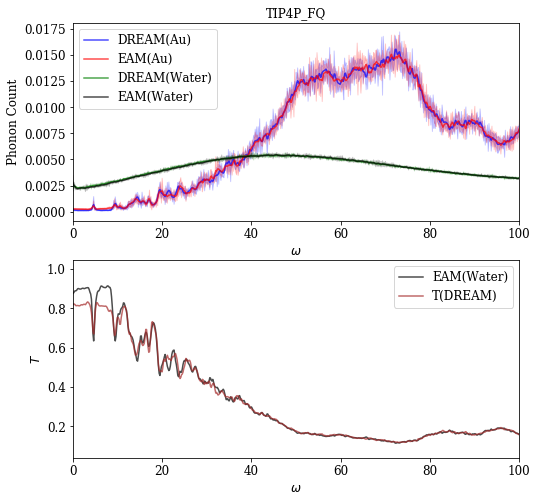

In [10]:
DOSPlot(path,lMF,"TIP4P_FQ",0,100)

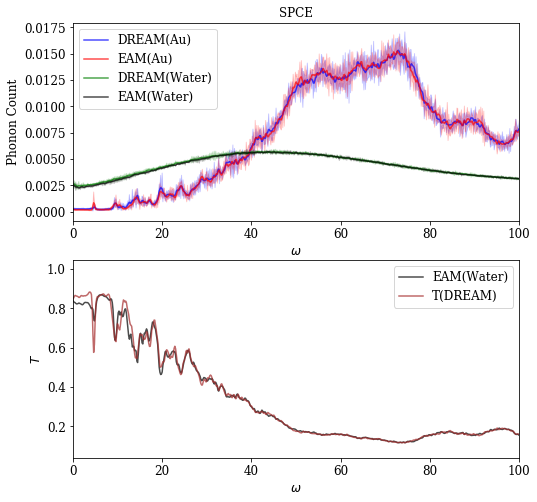

In [6]:
lWN=fileName("WN")
DOSPlot(path,lWN,"SPCE",0,100)

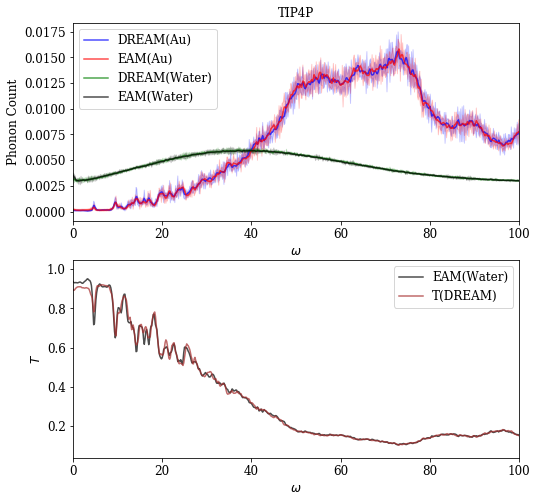

In [7]:
lWN_TIP4P=fileName("WN_TIP4P")
DOSPlot(path,lWN_TIP4P,"TIP4P",0,100)

In [1]:
f=[]
for i in range(1,21):
    f.append("I%d"%i)

In [2]:
def DOSPlot(path,l,title,freqL=0,freqU=200):
    fig=plt.figure(figsize=(8,8))
    ax1=fig.add_subplot(2,1,1)
    ax1.set_title(title)

    labels=["DREAM(Au)", "EAM(Au)", "DREAM(Water)", "EAM(Water)","T(DREAM)", "T(EAM)"]
    colors = ["blue", "red", "green", "black","brown","indigo"]
    for index,file in enumerate(l[0:-2]):
        fullpath = path + file
        df = pd.read_csv(fullpath, delimiter="\t", names=["f","smoothI","I","dI","dIP", "dIN"])
        ax1.plot(df.f,df.smoothI,alpha=0.7,color=colors[index],label=labels[index])
        ax1.fill_between(df.f, df.dIN, df.dIP,alpha=0.2, color=colors[index])
    ax1.set_xlim([freqL,freqU])
    ax1.set_ylabel("Phonon Count")
    ax1.set_xlabel("$\omega$")
    ax1.legend()
    
    
    ax2=fig.add_subplot(2,1,2)
    for index, file in enumerate(l[-2:]):
        fullpath = path + l[4+index]
        df = pd.read_csv(fullpath, delimiter="\t", names=["f","T"])
        ax2.plot(df["f"],df["T"],alpha=0.7,color=colors[index+3],label=labels[index+3])
        ax2.set_xlim([freqL,freqU])
        ax2.set_ylabel("$T$")
        ax2.set_xlabel("$\omega$")
        ax2.legend()
    fig.show()
    

['I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I17',
 'I18',
 'I19',
 'I20']

In [3]:
a="%di"

In [4]:
print(a%(1))

1i
